- Import for python

In [86]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

1. Get data from API

- We choose to work with regression because Regression algorithms are used to determine continuous values such as price, income, age, etc.

- In our case, we are going to predict the value of stock, taking date as input.

In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv")

2. Scaling

- Lets first create 

In [88]:
# make sure our date column is of date type
df["Date"] = pd.to_datetime(df['Date'])


df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2845 non-null   datetime64[ns]
 1   Open       2845 non-null   float64       
 2   High       2845 non-null   float64       
 3   Low        2845 non-null   float64       
 4   Close      2845 non-null   float64       
 5   Adj Close  2845 non-null   float64       
 6   Volume     2845 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.7 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Text(0, 0.5, 'Close')

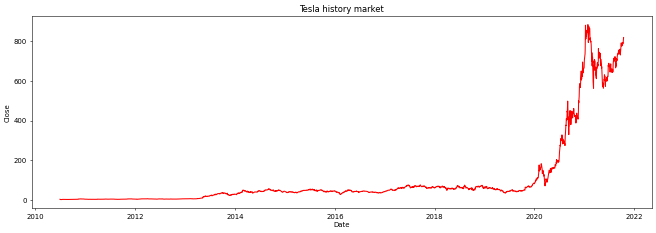

In [89]:
X = df['Date']
y = df['Close']


plt.figure(figsize=(16,5), dpi=50)
plt.plot(X, y, color="red")
plt.title("Tesla history market")
plt.xlabel("Date")
plt.ylabel("Close")

    

- By looking at this graph, we believe that there is no outlier in this dataset because the value of Tesla's stocks have been extremely increasing recently. This dataset also contains the values that is spread over 10 years.

<Axes: xlabel='Date', ylabel='Close'>

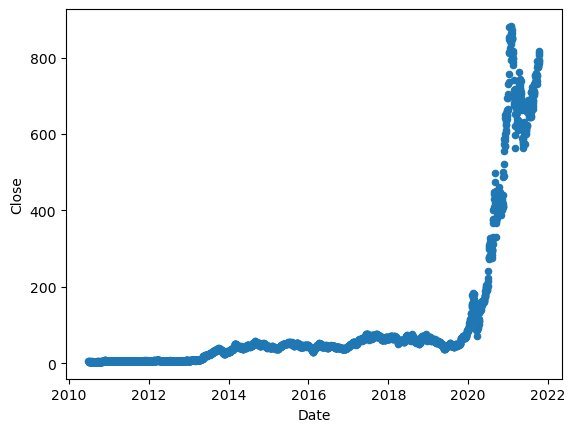

In [90]:
df.plot.scatter(x='Date', y = 'Close')

3. Train our model

- Split the set into training and testing test

In [91]:
# First, we use "Date" column as our index. To predict a specific date, we can use the method
# df.loc[date].values.reshape(1, -1) to extract data and make a prediction
df.set_index('Date', inplace=True)


# We use these four columns to calculate and predict data on one specific date
X = df[['Open', 'High','Low', 'Volume']]
y = df['Close']



# # test_size = 0.33 meaning that 1/3 of values will be in a test array
# Random state is a variable that seed the random generator, so that we can get hte same training
# and testing set each run


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False, random_state=42)

- 2/3 values in Date stored in X_train, and the rest is in X_test. We will now create linear regressor mode:

In [92]:
# create our object model
linear_regressor = LinearRegression()

# perform linear regression on our training data set
linear_regressor.fit(X_train, y_train)

Y_pred = linear_regressor.predict(X_test) # make prediction

In [93]:
# take in input date
indate = input("What day will you predict?")

specific_day = pd.to_datetime(indate)

# extract data on this day
data_on_this_day = X.loc[specific_day].values.reshape(1, -1)

# make a predict
predic_price = linear_regressor.predict(data_on_this_day)

print(f"Predict price is: {predic_price}")



Predict price is: [67.97845894]


d:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- Prediction Table of Actual Prices vs Predicted values


In [94]:
# Lets see the difference between the actual values and predicted values

compared_table = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': Y_pred})
compared_table.head()

,Actual_Price,Predicted_Price
Date,,
2018-01-24,69.178001,69.238003
2018-01-25,67.528000,67.978459
2018-01-26,68.570000,67.814454
2018-01-29,69.905998,69.571254
2018-01-30,69.164001,69.071393


- MSE value

In [95]:
print( "MSE = "+str(metrics.mean_squared_error(y_test, Y_pred))) #Calculate MSE

MSE = 22.617580322105965


- Prediction percentage score (R-squared)

In [96]:
pps = metrics.r2_score(y_test, Y_pred)

print(f"Prediction percentage score: {pps}")

Prediction percentage score: 0.9996879257892675
